In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report
from scipy.misc import derivative
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("iris.csv")

In [34]:
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sl       150 non-null float64
sw       150 non-null float64
pl       150 non-null float64
pw       150 non-null float64
class    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [35]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df2 = df[["pl", "pw"]]
df2.head()

,pl,pw
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


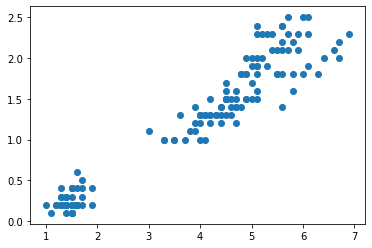

In [20]:
plt.scatter(df2["pl"].values, df2["pw"].values)
plt.show()

In [23]:
model = LinearRegression()
model.fit(df2["pl"].values.reshape(-1, 1), df2["pw"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.coef_

array([0.41641913])

In [26]:
model.intercept_

-0.3665140452167275

In [30]:
model.predict(np.array([[1.3]]))

array([0.17483083])

In [38]:
X = df[["sl", "sw", "pl", "pw"]].values
y = df["class"]

In [46]:
lbl_encoder = LabelEncoder()
y = lbl_encoder.fit_transform(y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
y_hat = model.predict(X_test)

In [65]:
f1_score(y_test, y_hat, average="weighted")

1.0

In [68]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [69]:
y_hat = lbl_encoder.inverse_transform(y_hat)
y_test = lbl_encoder.inverse_transform(y_test)

In [75]:
t = np.linspace(-15, 15, 5000)

In [76]:
y = 1 / (1 + np.exp(-t))

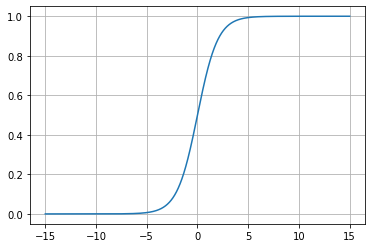

In [77]:
plt.plot(t, y)
plt.grid()

In [80]:
h = 0.0001
dy = ((1 /(1 + np.exp(-t))) - (1 /(1 + np.exp(-t + h)))) / h

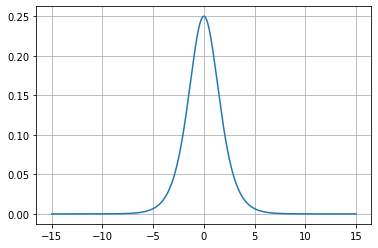

In [81]:
plt.plot(t, dy)
plt.grid()